# 웹 스크래핑 실습 및 csv 파일 작성과 이미지 스크래핑

In [40]:
from urllib.request import urlopen
from bs4 import  BeautifulSoup
from urllib.request import urlopen
from urllib.error   import HTTPError
from urllib.error   import URLError

In [41]:
url = 'https://www.imdb.com/title/tt4154756/reviews?ref_=tt_ql_3'

try:
    html = urlopen(url)
except HTTPError as he :
    print('http error')
except URLError as ue :
    print('url error')
else :
    soup = BeautifulSoup(html.read(), 'html.parser', from_encoding='utf-8')

>점수(별점), 리뷰 제목, 작성자 닉네임, 작성 날짜, 리뷰 내용

In [42]:
review_list = soup.find_all('div', {'class' : 'imdb-user-review'})
review_list

[<div class="lister-item mode-detail imdb-user-review collapsable" data-review-id="rw5504583" data-vote-url="/title/tt4154756/review/rw5504583/vote/interesting">
 <div class="review-container">
 <div class="lister-item-content">
 <div class="ipl-ratings-bar">
 <span class="rating-other-user-rating">
 <svg class="ipl-icon ipl-star-icon " fill="#000000" height="24" viewbox="0 0 24 24" width="24" xmlns="http://www.w3.org/2000/svg">
 <path d="M0 0h24v24H0z" fill="none"></path>
 <path d="M12 17.27L18.18 21l-1.64-7.03L22 9.24l-7.19-.61L12 2 9.19 8.63 2 9.24l5.46 4.73L5.82 21z"></path>
 <path d="M0 0h24v24H0z" fill="none"></path>
 </svg>
 <span>9</span><span class="point-scale">/10</span>
 </span>
 </div>
 <a class="title" href="/review/rw5504583/"> Great
 </a> <div class="display-name-date">
 <span class="display-name-link"><a href="/user/ur87850731/">MR_Heraclius</a></span><span class="review-date">23 February 2020</span>
 </div>
 <div class="content">
 <div class="text show-more__control">

## 자연어 처리 기초
- 꼬고마
- 한나눔
- 트위터

In [4]:
from konlpy.tag import Kkma

In [5]:
kkoma = Kkma()

In [6]:
kkoma.nouns('한국어 공부를 시작하겠습니다')

['한국어', '공부', '시작']

In [7]:
kkoma.sentences('신기한 도구입니다 재미있어요')

['신기한 도구입니다', '재미있어요']

In [8]:
kkoma.pos('형태소 분석을 시작합니다 한국어에요')

[('형태소', 'NNG'),
 ('분석', 'NNG'),
 ('을', 'JKO'),
 ('시작하', 'VV'),
 ('ㅂ니다', 'EFN'),
 ('한국어', 'NNG'),
 ('에', 'JKM'),
 ('요', 'JX')]

In [9]:
from wordcloud import WordCloud, STOPWORDS

In [10]:
import numpy as np
from PIL import Image

In [11]:
text = open('./data/07. alice.txt').read()

In [12]:
alice_mask = np.array(Image.open('./images/07. alice_mask.png'))

In [13]:
import matplotlib.pyplot as plt
%matplotlib inline

# 한글 폰트 문제 해결
import platform

from matplotlib import font_manager, rc
# plt.rcParams['axes.unicode_minus'] = False

if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    path = "c:/Windows/Fonts/malgun.ttf"
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else:
    print('Unknown system... sorry~~~~') 

<function matplotlib.pyplot.show(*args, **kw)>

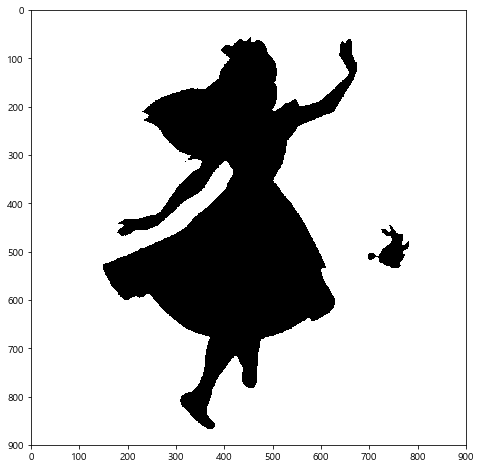

In [14]:
# 앨리스 그림 모양
plt.figure(figsize=(8,8))
plt.imshow(alice_mask, cmap=plt.cm.gray)
plt.show

In [15]:
sw = set(STOPWORDS)
sw.add('said')
wc = WordCloud(background_color='white', max_words=20000, mask=alice_mask)

In [16]:
wc = wc.generate(text)
wc.words_

{'said': 1.0,
 'Alice': 0.7225433526011561,
 'said Alice': 0.3352601156069364,
 'little': 0.31213872832369943,
 'one': 0.29190751445086704,
 'know': 0.26011560693641617,
 'went': 0.2398843930635838,
 'thing': 0.23121387283236994,
 'time': 0.22254335260115607,
 'Queen': 0.21965317919075145,
 'see': 0.1936416184971098,
 'King': 0.18497109826589594,
 'well': 0.18208092485549132,
 'now': 0.17341040462427745,
 'head': 0.17341040462427745,
 'began': 0.1676300578034682,
 'way': 0.16473988439306358,
 'Hatter': 0.16473988439306358,
 'Mock Turtle': 0.16184971098265896,
 'say': 0.15895953757225434,
 'Gryphon': 0.15895953757225434,
 'think': 0.1531791907514451,
 'quite': 0.15028901734104047,
 'much': 0.14739884393063585,
 'first': 0.14739884393063585,
 'thought': 0.14450867052023122,
 'go': 0.14450867052023122,
 'come': 0.13872832369942195,
 'never': 0.13583815028901733,
 'voice': 0.1329479768786127,
 'looked': 0.13005780346820808,
 'got': 0.13005780346820808,
 'must': 0.12716763005780346,
 'Cat':

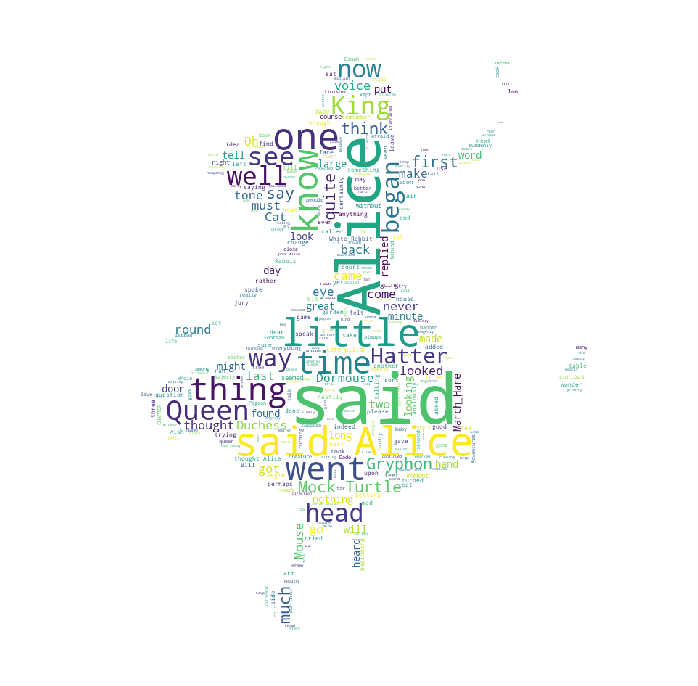

In [17]:
# 앨리스 그림 모양
plt.figure(figsize=(12,12))
plt.imshow(wc)
plt.axis('off')
plt.show()

>점수(별점), 리뷰 제목, 작성자 닉네임, 작성 날짜, 리뷰 내용

>감정분석(VADER) - NLTK

>good +0.1, awful -0.1, perfect +0.2

>문장에서 이러한 단어들이 추출되면 나올 때마다 점수를 더하고 빼서 점수가 양수이면 긍정, 음수이면 부정이라고 평가를 해본다.


In [18]:
from nltk import tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

sid = SentimentIntensityAnalyzer()

C:\Users\Hansol\Anaconda3\lib\site-packages\nltk\twitter\__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Hansol\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [43]:
data = []
sum_review = ''
for review in review_list :
#     print(review)
    score   = review.find('span').get_text().replace('\n', '')
    title   = review.find('a').get_text().replace('\n', '')
    writer  = review.find('span', {'class' : 'display-name-link'}).get_text()
    date    = review.find('span', {'class' : 'review-date'}).get_text()
    content = review.find('div', {'class' : 'text show-more__control'}).get_text()
    
    sum_review = sum_review+content
    
#     print(content)
    lines_list = tokenize.sent_tokenize(content)
    sum = 0
#     polarytiy_scores() : 문장을 단어별로 분석해서 긍정, 부정, 중립에 대한 점수를 계산하고
#     종합 점수[compound]를 반환
    for sent in lines_list :
        ss = sid.polarity_scores(sent)
        sum = sum + ss['compound']
    sum1 = str(sum/len(lines_list))
    
    data.append([score, title, writer, date, content, sum1])

In [44]:
print(score)

8/10


In [47]:
with open('./data/service_imdb_wordcloud.csv', mode = 'w', encoding='utf-8') as file:
    file.write('score, title, writer, date, content, sum \n')
    
#     data를 반복해서 저장
    for idx in data :
        file.write("{},{},{},{},{},{}\n".format(idx[0], idx[1], idx[2], idx[3], idx[4], idx[5]))

In [52]:
import pandas as pd
reviewDF = pd.DataFrame(data)
reviewDF

,0,1,2,3,4,5
0,9/10,Great,MR_Heraclius,23 February 2020,This movie portrays a villain that by far has ...,-0.06573333333333331
1,10/10,Way better than endgame,michaelhowell12,2 September 2019,This film is way better than endgame!\nThe act...,0.5872857142857143
2,10/10,IT'S NOT A MASTERPIECE..,ProfGenki,31 August 2020,..but still 10/10. Or 9.5 if its possible.The ...,0.3859333333333333
3,10/10,Somehow they pulled this off,Jesper2801,26 April 2018,I consider myself a big comic book marvel fan....,0.22276249999999997
4,10/10,Unlike anything ever done in the history of c...,kjames-26542,14 August 2018,This movie is the beginning of the culmination...,-0.012816666666666652
5,10/10,This movie will blow your mind and break your...,shawneofthedead,25 April 2018,"Over the past decade, Marvel has earned itself...",0.12366538461538462
6,10/10,Best movie Avengers infinity war 2018,udit-mehra-631,12 July 2020,Best movie Avengers infinity war 2018 I was am...,0.29388
7,10/10,"Worth the wait, believe the hype",ubtgkse,29 July 2020,Avengers infinity war is a masterpiece in ever...,0.49345
8,10/10,A Summer Film That IS Even Better Than The Hype,garethvk,24 April 2018,Summer movies often hype themselves as spectac...,0.2901666666666667
9,9/10,Excellent Film,kevintgeisler,19 June 2018,I was amazed to see so many negative reviews; ...,0.27908


In [ ]:
reviewDF[0]

In [46]:
import pandas as pd
df = pd.read_csv('./data/service_imdb_wordcloud.csv', encoding='utf-8')
df

ParserError: Error tokenizing data. C error: Expected 9 fields in line 15, saw 11


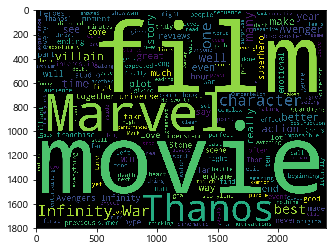

In [23]:
wordcloud = WordCloud(
    width=2400,
    height=1800,
    stopwords=set(STOPWORDS)).generate(sum_review)
plt.imshow(wordcloud)
plt.show()